# Projeto 9: Classificação de objetos (CIFAR-10)

- Base de dados: https://www.cs.toronto.edu/~kriz/cifar.html


# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.8.0'

# Etapa 2: Carregamento da base de dados

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# Etapa 3: Visualização dos dados

[1]


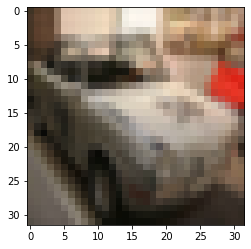

In [7]:
i = 302
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


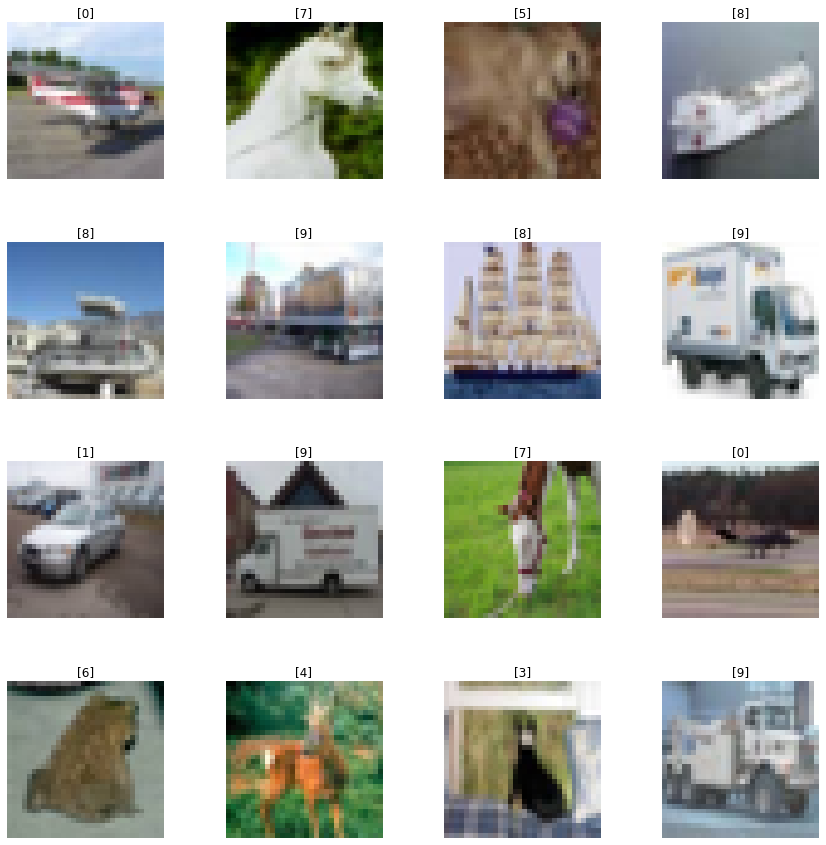

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);

# Etapa 4: Preparação dos dados

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
number_cat = 10

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
input_shape = X_train.shape[1:]

In [22]:
input_shape

(32, 32, 3)

In [23]:
y_train.shape

(50000, 10)

# Etapa 5: Construção e treinamento do modelo

In [24]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [25]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), 
            loss ='categorical_crossentropy', metrics =['accuracy'])

In [26]:
epochs = 100
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs,validation_split = 0.2)

Epoch 1/100
79/79 [==============================] - 15s 43ms/step - loss: 2.1242 - accuracy: 0.2029 - val_loss: 1.9942 - val_accuracy: 0.2484
Epoch 2/100
79/79 [==============================] - 3s 35ms/step - loss: 1.9090 - accuracy: 0.3031 - val_loss: 1.8604 - val_accuracy: 0.3335
Epoch 3/100
79/79 [==============================] - 3s 35ms/step - loss: 1.7941 - accuracy: 0.3496 - val_loss: 1.7320 - val_accuracy: 0.3837
Epoch 4/100
79/79 [==============================] - 3s 35ms/step - loss: 1.7193 - accuracy: 0.3774 - val_loss: 1.7076 - val_accuracy: 0.3862
Epoch 5/100
79/79 [==============================] - 3s 35ms/step - loss: 1.6585 - accuracy: 0.3989 - val_loss: 1.5952 - val_accuracy: 0.4211
Epoch 6/100
79/79 [==============================] - 3s 36ms/step - loss: 1.6027 - accuracy: 0.4200 - val_loss: 1.5670 - val_accuracy: 0.4383
Epoch 7/100
79/79 [==============================] - 3s 36ms/step - loss: 1.5576 - accuracy: 0.4334 - val_loss: 1.4999 - val_accuracy: 0.4653
Epoch

# Etapa 6: Avaliação do modelo

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

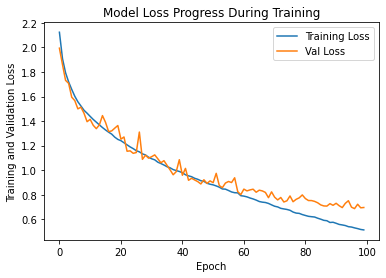

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Val Loss']);

In [29]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7220 - accuracy: 0.7615
Test Accuracy: 0.7615000009536743


In [30]:
predicted_classes = cnn.predict(X_test) 
predicted_classes

array([[1.3888786e-03, 4.9711810e-03, 9.3108816e-03, ..., 7.7807746e-04,
        7.5500067e-03, 7.3428277e-04],
       [2.8730841e-02, 6.9284528e-02, 1.4977842e-05, ..., 7.7815440e-07,
        8.9790052e-01, 4.0484960e-03],
       [1.9089520e-01, 6.1107058e-02, 3.3465051e-04, ..., 4.6038593e-04,
        7.1807921e-01, 2.7208103e-02],
       ...,
       [9.9003128e-06, 4.1660787e-06, 2.7787243e-03, ..., 3.7311157e-03,
        7.7648634e-05, 7.7024233e-05],
       [6.7799129e-03, 9.4146788e-01, 3.7866670e-03, ..., 2.1989890e-03,
        2.4801746e-04, 5.1117130e-03],
       [8.9700114e-09, 2.7757021e-09, 2.0365984e-07, ..., 9.9975389e-01,
        2.0372799e-09, 3.2709458e-08]], dtype=float32)

In [31]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [32]:
y_test = y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

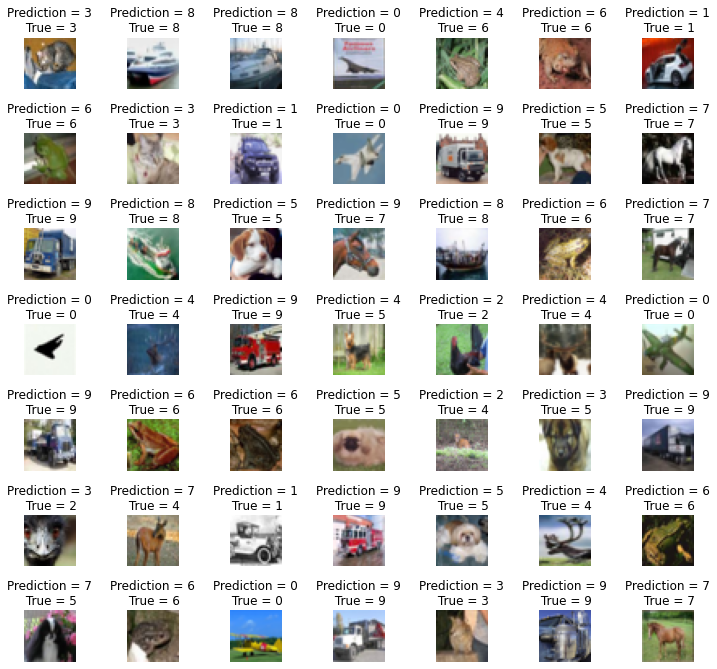

In [34]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i].argmax(), y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

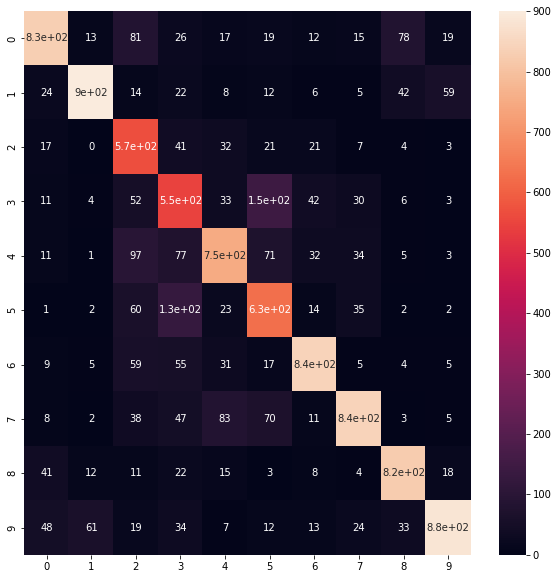

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes.argmax(1), y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [36]:
cm

array([[830,  13,  81,  26,  17,  19,  12,  15,  78,  19],
       [ 24, 900,  14,  22,   8,  12,   6,   5,  42,  59],
       [ 17,   0, 569,  41,  32,  21,  21,   7,   4,   3],
       [ 11,   4,  52, 548,  33, 146,  42,  30,   6,   3],
       [ 11,   1,  97,  77, 751,  71,  32,  34,   5,   3],
       [  1,   2,  60, 128,  23, 629,  14,  35,   2,   2],
       [  9,   5,  59,  55,  31,  17, 841,   5,   4,   5],
       [  8,   2,  38,  47,  83,  70,  11, 841,   3,   5],
       [ 41,  12,  11,  22,  15,   3,   8,   4, 823,  18],
       [ 48,  61,  19,  34,   7,  12,  13,  24,  33, 883]])